In [24]:
# import the necessary modules 

import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [25]:
#import the  data file  

data=pd.read_csv('./data.csv')
data.shape

(5572, 2)

In [26]:
# read the first 5 sample of data 

data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [27]:
data.groupby('Category').describe().T

Category                           ham  \
Message count                     4825   
        unique                    4516   
        top     Sorry, I'll call later   
        freq                        30   

Category                                                     spam  
Message count                                                 747  
        unique                                                641  
        top     Please call our customer service representativ...  
        freq                                                    4

In [28]:
# split the date based on the category viz: ham and spam 

ham_data = data[data.Category == 'ham']
spam_data = data[data.Category == 'spam']
print(spam_data.shape)
print(ham_data.shape)
print(data.shape)

(747, 2)
(4825, 2)
(5572, 2)


In [29]:
ham_data=ham_data.sample(n=len(spam_data),random_state=42)
print(ham_data.shape,spam_data.shape)

(747, 2) (747, 2)


In [30]:
# create a balanced data having equal no of ham and spam data and place them in cluster i.e ham at the top followed by spam and also reset the index to start from 0

balanced_data=ham_data.append(spam_data).reset_index(drop=True)
print(balanced_data.shape)

(1494, 2)


C:\Users\subek\AppData\Local\Temp\ipykernel_14964\1648542881.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  balanced_data=ham_data.append(spam_data).reset_index(drop=True)


In [31]:
#read the top 5 data from newly created balanced data 

balanced_data.head()

,Category,Message
0,ham,If i not meeting ü all rite then i'll go home ...
1,ham,"I.ll always be there, even if its just in spir..."
2,ham,"Sorry that took so long, omw now"
3,ham,I thk 50 shd be ok he said plus minus 10.. Did...
4,ham,Dunno i juz askin cos i got a card got 20% off...


In [32]:
#create an extra column named label by assigning ham to 0 and spam to 1

balanced_data['label']=balanced_data['Category'].map({'ham':0,'spam':1})

In [33]:
balanced_data.head()

,Category,Message,label
0,ham,If i not meeting ü all rite then i'll go home ...,0
1,ham,"I.ll always be there, even if its just in spir...",0
2,ham,"Sorry that took so long, omw now",0
3,ham,I thk 50 shd be ok he said plus minus 10.. Did...,0
4,ham,Dunno i juz askin cos i got a card got 20% off...,0


In [34]:
# First, split the data into training and testing sets
train_data, rem_data, train_labels, rem_labels = train_test_split(balanced_data['Message'], balanced_data['label'], test_size=0.2, random_state=434)

# Then, split the training data further into training and validation sets
test_data, val_data, test_labels, val_labels = train_test_split(rem_data, rem_labels, test_size=0.5, random_state=434)

In [35]:
words_to_index=1000
oov_tok='<OOV>'
max_len=50

In [36]:
token=Tokenizer(num_words=words_to_index,oov_token=oov_tok)
token.fit_on_texts(train_data)

In [37]:
word_index=token.word_index
word_index

{'<OOV>': 1,
 'to': 2,
 'you': 3,
 'a': 4,
 'i': 5,
 'call': 6,
 'the': 7,
 'your': 8,
 'u': 9,
 'for': 10,
 '2': 11,
 'and': 12,
 'is': 13,
 'now': 14,
 'free': 15,
 'or': 16,
 'in': 17,
 'on': 18,
 'have': 19,
 'ur': 20,
 'of': 21,
 'txt': 22,
 '4': 23,
 'me': 24,
 'are': 25,
 'with': 26,
 'from': 27,
 'text': 28,
 'this': 29,
 'my': 30,
 'get': 31,
 'stop': 32,
 'mobile': 33,
 'just': 34,
 'no': 35,
 'it': 36,
 'will': 37,
 'reply': 38,
 'only': 39,
 'be': 40,
 'that': 41,
 'claim': 42,
 'www': 43,
 'not': 44,
 'out': 45,
 'do': 46,
 'send': 47,
 'new': 48,
 'so': 49,
 'our': 50,
 'we': 51,
 'but': 52,
 'at': 53,
 'prize': 54,
 'can': 55,
 'cash': 56,
 'all': 57,
 'if': 58,
 "i'm": 59,
 'who': 60,
 '150p': 61,
 'uk': 62,
 'go': 63,
 '1': 64,
 'nokia': 65,
 'please': 66,
 'win': 67,
 't': 68,
 'tone': 69,
 'won': 70,
 'week': 71,
 'com': 72,
 'msg': 73,
 '50': 74,
 'was': 75,
 'day': 76,
 'up': 77,
 'phone': 78,
 'by': 79,
 'been': 80,
 'what': 81,
 'want': 82,
 'service': 83,
 'know

In [38]:
Trainning_seq=token.texts_to_sequences(train_data)
Trainning_pad=pad_sequences(Trainning_seq,maxlen=50,padding='post',truncating='post')

In [39]:
Testing_seq=token.texts_to_sequences(test_data)
Testing_pad=pad_sequences(Testing_seq,maxlen=50,padding='post',truncating='post')

In [40]:
Validation_seq=token.texts_to_sequences(val_data)
Validation_pad=pad_sequences(Validation_seq,maxlen=50,padding='post',truncating='post')

In [41]:
# create a sequential model 

model=tf.keras.models.Sequential([
    tf.keras.layers.Embedding(words_to_index,16,input_length=50),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    #tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1,activation='sigmoid')
])




In [42]:
# compile the model

from tensorflow.keras.losses import BinaryCrossentropy 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [43]:
# train/fit the model

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history=model.fit(Trainning_pad,train_labels,validation_data=(Validation_pad,val_labels),epochs=30,verbose=2,callbacks=[early_stop])



Epoch 1/30
38/38 - 6s - loss: 0.6439 - accuracy: 0.7473 - val_loss: 0.4749 - val_accuracy: 0.8267 - 6s/epoch - 166ms/step
Epoch 2/30
38/38 - 1s - loss: 0.3867 - accuracy: 0.8477 - val_loss: 0.2984 - val_accuracy: 0.8800 - 736ms/epoch - 19ms/step
Epoch 3/30
38/38 - 1s - loss: 0.2198 - accuracy: 0.9222 - val_loss: 0.1560 - val_accuracy: 0.9400 - 743ms/epoch - 20ms/step
Epoch 4/30
38/38 - 1s - loss: 0.1379 - accuracy: 0.9582 - val_loss: 0.1480 - val_accuracy: 0.9333 - 776ms/epoch - 20ms/step
Epoch 5/30
38/38 - 1s - loss: 0.1083 - accuracy: 0.9724 - val_loss: 0.0885 - val_accuracy: 0.9800 - 758ms/epoch - 20ms/step
Epoch 6/30
38/38 - 1s - loss: 0.0752 - accuracy: 0.9799 - val_loss: 0.0886 - val_accuracy: 0.9600 - 762ms/epoch - 20ms/step
Epoch 7/30
38/38 - 1s - loss: 0.0601 - accuracy: 0.9833 - val_loss: 0.0820 - val_accuracy: 0.9667 - 732ms/epoch - 19ms/step
Epoch 8/30
38/38 - 1s - loss: 0.0524 - accuracy: 0.9874 - val_loss: 0.1149 - val_accuracy: 0.9600 - 784ms/epoch - 21ms/step
Epoch 9/30

In [44]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 16)            16000     
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               12544     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 30,657
Trainable params: 30,657
Non-trainable params: 0
__________________________________________________

In [45]:
model.evaluate(Testing_pad,test_labels)

5/5 [==============================] - 0s 6ms/step - loss: 0.0545 - accuracy: 0.9799


[0.05448450148105621, 0.9798657894134521]

Text(0.5, 0, 'epoch')

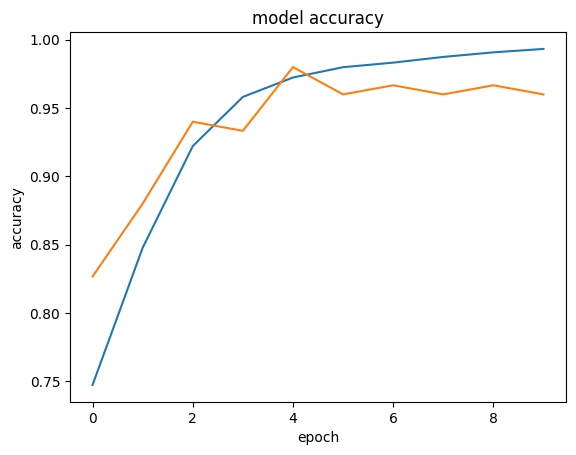

In [46]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')


In [47]:
#these mails are the one i received on my personal email 

new_email=["This week, save big on all GRE prep plans. Your coupon code MAGOOSH20SALE will be automatically applied at checkout. Pay for your plan in installments or all in one go. Whatever you choose, your future self will thank you.","All GRE Prep Plans Are on Sale Now.This is your year to get into that dream graduate program. Our 20 percent off sale can help.","We noticed you're getting a lot of invitations lately, so we're sending this summary highlighting the ones that stand out."]

In [48]:
def predict_spam(new_email):
    new_seq=token.texts_to_sequences(new_email)
    new_pad=pad_sequences(new_seq,maxlen=50,padding='post',truncating='post')
    return(model.predict(new_pad))

In [49]:
#the model sucessfully distinguished the spam mails from the ham mails as done by the google spam filter :) 

predict_spam(new_email)

1/1 [==============================] - 1s 738ms/step


array([[0.98679537],
       [0.9970003 ],
       [0.01007387]], dtype=float32)